In [1]:
# main_script.py
import os
import csv
from neural_analysis_240  import analyze_neural_activity
import pandas as pd
from scipy.signal import find_peaks
import numpy as np
from scipy.signal import argrelmax
from scipy.integrate import trapz
from sklearn.metrics import auc
from scipy.stats import linregress
from datetime import datetime
import glob
import warnings
import sys

# Path to the large folder containing neural data and behavioral data subfolders
base_folder = 'C:/Users/shun/Desktop/Python/Fiber_Photometry'



In [23]:
# Neural data and behavioral data folders

neural_data_folder = os.path.join(base_folder, 'Neural_data')
behavioral_data_folder = os.path.join(base_folder, 'Behavioral_data')
summary_folder  = os.path.join(base_folder, 'Summary')


neural_data_files = sorted(glob.glob(neural_data_folder + "/*.csv"))
behavioral_data_files = sorted(glob.glob(behavioral_data_folder + "/*.csv"))

# Count the number of files in the neural data folder
number_of_files = len(neural_data_files)

if len(neural_data_files) != len(behavioral_data_files):
    sys.exit('ファイルの数が異なります')

Log_file = base_folder + "/Log/processing log.csv"
with open(Log_file, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')

    # Write data
    for row in zip(neural_data_files, behavioral_data_files):
        csv_writer.writerow(row)
    print("ファイルの処理順をログファイルに残しました。確認してください")
    
    
    
    
# Iterate through each file
warnings.filterwarnings("ignore", category=RuntimeWarning, message="Mean of empty slice")
data_list = []

for i in range(number_of_files):
    # Call the function to analyze neural and behavioral data
    analyze_neural_activity(neural_data_files[i], behavioral_data_files[i], summary_folder)
warnings.resetwarnings()





print("Finished !!")

NameError: name 'base_folder' is not defined

In [2]:
# main_script.py
import os
import csv
from neural_analysis_240  import analyze_neural_activity
import pandas as pd
from scipy.signal import find_peaks
import numpy as np
from scipy.signal import argrelmax
from scipy.integrate import trapz
from sklearn.metrics import auc
from scipy.stats import linregress
from datetime import datetime
import glob
import warnings
import sys

# Path to the large folder containing neural data and behavioral data subfolders
base_folder = 'C:/Users/shun/Desktop/Python/Fiber_Photometry'

from neural_Stat_110  import stat_neural_activity

behavioral_data_folder = os.path.join(base_folder, 'Behavioral_data')
behavioral_data_files = sorted(glob.glob(behavioral_data_folder + "/*.csv"))

summary_folder  = os.path.join(base_folder, 'Summary')
summary_data_files = sorted(glob.glob(summary_folder + "/*.csv"))
numb_summ_files = len(summary_data_files)


#if len(summary_data_files) != len(behavioral_data_files):
#    sys.exit('ファイルの数が異なります')

    
Fig_output = False
data_list = []
for i in range(numb_summ_files):
    result =stat_neural_activity(summary_data_files[i], behavioral_data_files[i], summary_folder, Fig_output)
    # Append results to data_list
    data_list.append(result)
warnings.resetwarnings()

# Write to CSV
header = [
    "file_name",
    "average", "count","IBI",
    "average peak intensity",
    "peaks number",
    "Max value",
    "Max value time",
    "Mean fisrt 3 sec",
    "Mean fisrt 30 sec",
    "zs_AUC_1min",
    "zs_AUC_5min",
    "zs_AUC_10min",
    "zs_AUC_15min",
    "interval_mean_thres0",
    "interval_mean_thres2",
    "Mean thres2",
    "peak number thres2",
    "AUC Lick",
    "AUC_IBI",
    "interval_counts"]


csv_filename = os.path.join(summary_folder, 'output_data.csv')
with open(csv_filename, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')

    # Write header
    csv_writer.writerow(header)
    
    # Write data
    for data_row in data_list:
        data_row_as_list = [item for item in data_row]
        csv_writer.writerow(data_row_as_list)

print("Finished !!")


Finished !!


In [2]:
import os
import pandas as pd
from scipy.stats import pearsonr

# Load the CSV file into a DataFrame
csv_filename_r = os.path.join(summary_folder, 'output_data.csv')
df_csv = pd.read_csv(csv_filename_r)

# Select the necessary columns
selected_columns = df_csv.iloc[:, 1:]

# Initialize the results dictionary
results = {
    'Variable': [],
    'average_R': [],
    'average_P': [],
    'count_R': [],
    'count_P': []
}

# Calculate correlation coefficients and p-values for 'average' and 'count'
average_column = selected_columns.columns[2]
count_column = selected_columns.columns[1]

for col in selected_columns.columns[2:]:
    # Calculate correlation and p-value for 'average'
    average_corr, average_p = pearsonr(selected_columns[average_column], selected_columns[col])
    # Calculate correlation and p-value for 'count'
    count_corr, count_p = pearsonr(selected_columns[count_column], selected_columns[col])
    
    # Append results to the dictionary
    results['Variable'].append(col)
    results['average_R'].append(average_corr)
    results['average_P'].append(average_p)
    results['count_R'].append(count_corr)
    results['count_P'].append(count_p)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Specify the path to save the new CSV file
csv_filename_r = os.path.join(summary_folder, 'correlation_results_with_pvalues.csv')

# Write the results to the specified CSV file
results_df.to_csv(csv_filename_r, index=False)


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from concurrent.futures import ThreadPoolExecutor

# Seabornのスタイルを適用
sns.set_style("white")

# ファイルの読み込み（コントロール群と介入群のファイルリストを別々に用意）
cornoil_files = sorted(glob.glob("C:/Users/shun/Desktop/Python/Fiber_Photometry/Summary/processed_corn*.csv"))


# データの格納リスト
def load_data(files):
    data_list = []
    for file in files:
        df = pd.read_csv(file)
        time = df.iloc[:, 0].values
        values = df.iloc[:, 2].values
        # 0〜300秒の範囲でフィルタリング
        mask = (time >= 0) & (time <= 300)
        data_list.append((time[mask], values[mask]))
    return data_list

# 25msごとに時間区間を分けて、各区間の平均を計算する関数
def resample_to_fixed_intervals(time, values, interval_sec=1):
    intervals = np.floor(time / interval_sec).astype(int)
    unique_intervals = np.unique(intervals)
    resampled_values = []
    for interval in unique_intervals:
        interval_mask = (intervals == interval)
        avg_value = values[interval_mask].mean(axis=0)
        resampled_values.append(avg_value)
    resampled_time = (unique_intervals * interval_sec) + (interval_sec / 2)
    return resampled_time, np.array(resampled_values)

# 各ファイルを並列処理で処理する関数
def process_file(time, values, base_time):
    resampled_time, resampled_values = resample_to_fixed_intervals(time, values)
    interpolated_values = np.interp(base_time, resampled_time, resampled_values)
    return interpolated_values


# 各群の平均とSEMを計算する関数
def calculate_mean_and_sem(resampled_values):
    mean_values = np.mean(resampled_values, axis=0)
    sem_values = np.std(resampled_values, axis=0) / np.sqrt(resampled_values.shape[0])
    return mean_values, sem_values

# それぞれのデータセットを読み込む
cornoil_data = load_data(cornoil_files)
# 最初のcornoilのファイルのリサンプル時間を基準にして他のデータを補間
base_time, _ = resample_to_fixed_intervals(cornoil_data[0][0], cornoil_data[0][1])


# 並列処理を使用してcornoilデータを処理
with ThreadPoolExecutor() as executor:
    cornoil_resampled_values = list(executor.map(lambda data: process_file(data[0], data[1], base_time), cornoil_data))
    
    
# 各データをオーバーラップしてプロット
#for resampled_values in all_resampled_values:
#    plt.plot(base_time, resampled_values, color='blue', alpha=0.5)

# cornoil群の平均とSEMを計算
mean_cornoil_values, sem_cornoil_values = calculate_mean_and_sem(np.array(cornoil_resampled_values))


In [10]:
vehicle_files = sorted(glob.glob("C:/Users/shun/Desktop/Python/Fiber_Photometry/Summary/processed_vehicle*.csv"))
vehicle_data = load_data(vehicle_files)
# 最初のvehicleのファイルのリサンプル時間を基準にして他のデータを補間
base_time_vehicle, _ = resample_to_fixed_intervals(vehicle_data[0][0], vehicle_data[0][1])

# 並列処理を使用してvehicleデータを処理
with ThreadPoolExecutor() as executor:
    vehicle_resampled_values = list(executor.map(lambda data: process_file(data[0], data[1], base_time_vehicle), vehicle_data))

mean_vehicle_values, sem_vehicle_values = calculate_mean_and_sem(np.array(vehicle_resampled_values))


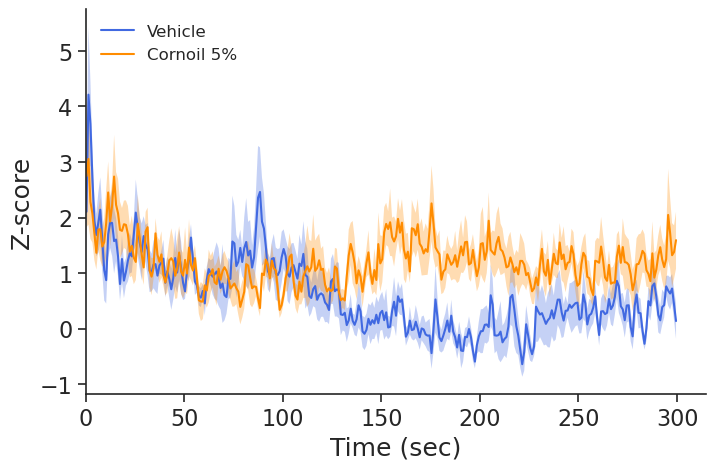

In [11]:
# グラフの描画 hotpink royalblue darkorange

from matplotlib import rcParams, font_manager
# フォントをHelvetica Neueに設定
font_path = "C:/Users/shun/AppData/Local/Microsoft/Windows/Fonts/HelveticaNeue.ttf"
prop = font_manager.FontProperties(fname=font_path)
rcParams["font.family"] = prop.get_name()


fig, ax = plt.subplots(figsize=(8, 5), facecolor='none')
ax.plot(base_time_vehicle, mean_vehicle_values, label='Vehicle', color='royalblue')
ax.fill_between(base_time_vehicle, mean_vehicle_values - sem_vehicle_values, mean_vehicle_values + sem_vehicle_values, color='royalblue', alpha=0.3, edgecolor='none')

ax.plot(base_time, mean_cornoil_values, label='Cornoil 5%', color='darkorange')
ax.fill_between(base_time, mean_cornoil_values - sem_cornoil_values, mean_cornoil_values + sem_cornoil_values, color='darkorange', alpha=0.3, edgecolor='none')




#for i in range(cornoil_resampled_values.shape[0]):
#    plt.plot(cornoil_resampled_time, cornoil_resampled_values[i], color='royalblue', alpha=0.5)  # alphaで透明度を設定






# 軸と枠の設定
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.set_xlabel("Time (sec)", fontsize=18)
ax.set_ylabel("Z-score", fontsize=18)

# 軸の目盛り設定
ax.tick_params(axis='both', which='both', direction='out', labelsize=16, length=6, width=1.2)
ax.tick_params(axis='x', bottom=True)
ax.tick_params(axis='y', left=True)

# 0時点を一番左に設定
ax.set_xlim(left=0)
# y軸の最小値、最大値、ステップを手動で指定
y_min = -1  # 最小値
y_max = 3   # 最大値
y_step = 1   # ステップ

# rangeを使用して目盛りを設定
#import numpy as np
#ax.set_xticks(np.arange(0, 2401, 300))
#ax.set_xlim(0, 2400)

# レジェンドの透明化と枠の削除（左上に配置）
legend = ax.legend(loc='upper left', frameon=False, facecolor='none', fontsize=12)
ax.grid(False)
plt.savefig("vehicle corn_300sec.svg", format="svg", transparent=True, bbox_inches='tight')

plt.show()



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import glob
import os

def compute_intervals(file_path):
    # データ読み込み
    data = pd.read_csv(file_path)
    time = data['Time(s)'].values  # Time列が秒単位の時間情報を持っていると仮定
    signal = data['Z-score'].values  # 信号データ
    
    # 0~300秒の範囲に限定
    mask = (time >= 0) & (time <= 300)
    time = time[mask]
    signal = signal[mask]
    
    # ピーク検出
    peaks, _ = find_peaks(signal, height=0)  # 閾値を適宜調整
    # ピーク間のインターバル計算
    if len(peaks) > 1:
        intervals = np.diff(time[peaks])  # ピーク時間の差分を取る
    else:
        intervals = np.array([])
    
    return intervals



# VehicleとCornoilのデータを保存するリスト
vehicle_intervals = []
cornoil_intervals = []

# ファイルを取得して処理
for file_path in glob.glob(os.path.join(folder_path, "*.csv")):
    intervals = compute_intervals(file_path)
    if len(intervals) > 0:
        if "vehicle" in file_path:
            vehicle_intervals.extend(intervals)
        elif "cornoil" in file_path:
            cornoil_intervals.extend(intervals)

# ヒストグラムをプロット


2021
974
1632
1795
1713
1229
1142
1927
861
842
710
828
1425
1947
893
1321


In [21]:
import os
import glob
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

# --- 時間範囲指定 ---
start_time = 0    # 秒
end_time   = 900  # 秒

# 1. フォルダ内のファイルリストを取得
folder_path = "C:/Users/shun/Desktop/Python/Fiber_Photometry/Summary"
file_list = glob.glob(os.path.join(folder_path, "*.csv"))

all_stats = []

for filepath in file_list:
    subject = os.path.splitext(os.path.basename(filepath))[0]
    
    # 2. データ読み込み
    df_raw = pd.read_csv(filepath)
    time   = df_raw['Time(s)'].values
    signal = df_raw['Z-score'].values  # 列名に合わせてください
    
    # 3. 時間範囲でフィルタ
    mask = (time >= start_time) & (time <= end_time)
    t_win = time[mask]
    s_win = signal[mask]
    
    # 4. ピーク検出 → 瞬時周波数
    peaks = find_peaks(s_win)[0]
    times = t_win[peaks]
    intervals = np.diff(times)
    freqs = np.insert(1.0 / intervals, 0, np.nan)
    
    # 5. DataFrame 化
    df_pk = pd.DataFrame({
        'subject':    subject,
        'time_range': f"{start_time}-{end_time}s",
        'inst_freq':  freqs
    }).dropna(subset=['inst_freq'])
    
    # --- 追加: 10Hz以下の塊数(run_count)を計算 ---
    df_pk['is_less'] = df_pk['inst_freq'] <= 10
    df_pk['run_start'] = df_pk['is_less'] & (~df_pk['is_less'].shift(fill_value=False))
    run_count = int(df_pk['run_start'].sum())
    # --------------------------------------------------
    
    # 6. グルーピングラベル付与
    df_pk['group'] = np.where(df_pk['is_less'], 'less_10Hz', 'more_10Hz')
    
    # 7. 統計量算出
    stats = df_pk.groupby('group').agg(
        peak_count   = ('inst_freq', 'count'),
        mean_freq    = ('inst_freq', 'mean'),
        std_freq     = ('inst_freq', 'std'),
        median_freq  = ('inst_freq', 'median')
    ).reset_index()
    
    # 8. less_10Hz 行にだけ塊数を追加
    stats['less_run_count'] = 0
    stats.loc[stats['group'] == 'less_10Hz', 'less_run_count'] = run_count
    
    # 9. subject と time_range を列先頭に移動
    stats.insert(0, 'subject', subject)
    stats.insert(1, 'time_range', f"{start_time}-{end_time}s")
    
    all_stats.append(stats)

# 10. 縦結合
result_df = pd.concat(all_stats, ignore_index=True)

# 11. ピボットして各群を列に展開（less_run_count も含む）
pivot_df = result_df.pivot_table(
    index=['subject', 'time_range'],
    columns='group',
    values=['peak_count', 'mean_freq', 'std_freq', 'median_freq', 'less_run_count']
)

# 12. マルチインデックスをフラット化
pivot_df.columns = [f"{metric}_{grp}" for metric, grp in pivot_df.columns]
pivot_df = pivot_df.reset_index()

# 13. CSV に書き出し
output_path = "peak_stats_summary.csv"
pivot_df.to_csv(output_path, index=False)
print(f"Summary written to {output_path}")


Summary written to peak_stats_summary.csv


Vehicle counts: [860, 841, 709, 827, 1424, 1946, 892, 1320]
Cornoil counts: [2020, 973, 1631, 1794, 1712, 1228, 1141, 1926]
Paired T-test: T-statistic = -2.1121137206067084, P-value = 0.07256159451103059


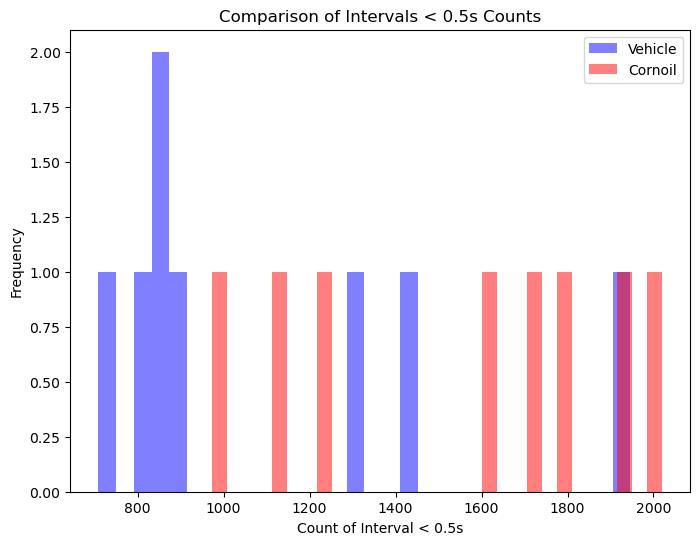

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
import glob
import os

def compute_intervals(file_path):
    # データ読み込み
    data = pd.read_csv(file_path)
    time = data['Time(s)'].values  # Time列が秒単位の時間情報を持っていると仮定
    signal = data['Z-score'].values  # 信号データ
    
    # 0~300秒の範囲に限定
    mask = (time >= 0) & (time <= 300)
    time = time[mask]
    signal = signal[mask]
    
    # ピーク検出
    peaks, _ = find_peaks(signal, height=0)  # 閾値を適宜調整
    
    # ピーク間のインターバル計算
    if len(peaks) > 1:
        intervals = np.diff(time[peaks])  # ピーク時間の差分を取る
    else:
        intervals = np.array([])
    
    return intervals


# データフォルダのパス
folder_path = "C:/Users/shun/Desktop/Python/Fiber_Photometry/Summary"  # 実際のフォルダパスに変更

# VehicleとCornoilのデータを保存するリスト
vehicle_counts = []
cornoil_counts = []

# ファイルを取得して処理
vehicle_files = sorted(glob.glob(os.path.join(folder_path, "*vehicle*.csv")))
cornoil_files = sorted(glob.glob(os.path.join(folder_path, "*cornoil*.csv")))

for v_file, c_file in zip(vehicle_files, cornoil_files):
    v_intervals = compute_intervals(v_file)
    c_intervals = compute_intervals(c_file)
    
    vehicle_counts.append(len(v_intervals <= 0.3))
    cornoil_counts.append(len(c_intervals <= 0.3))

# 有意差検定 (対応のあるt検定)
t_stat, p_value = ttest_rel(vehicle_counts, cornoil_counts)
#t_stat, p_value = ttest_ind(vehicle_counts, cornoil_counts, equal_var=False)
# 実測値を表示
print("Vehicle counts:", vehicle_counts)
print("Cornoil counts:", cornoil_counts)
print(f"Paired T-test: T-statistic = {t_stat}, P-value = {p_value}")

# ヒストグラムをプロット
plt.figure(figsize=(8, 6))
plt.hist(vehicle_counts, bins=30, alpha=0.5, label='Vehicle', color='blue')
plt.hist(cornoil_counts, bins=30, alpha=0.5, label='Cornoil', color='red')
plt.xlabel("Count of Interval < 0.5s")
plt.ylabel("Frequency")
plt.legend()
plt.title("Comparison of Intervals < 0.5s Counts")
plt.show()